# Logistic Regression

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x = np.array([[1,0.1], [3,0.2], [5,0.1]])
y = np.array([1,0,1])
model = LogisticRegression()
model.fit(x,y)
new_point = np.array([[10,13]]) 
print(model.predict(new_point))
print(x)
print(y)

[0]
[[1.  0.1]
 [3.  0.2]
 [5.  0.1]]
[1 0 1]


In [32]:
# Build a dataframe
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,
                       620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,
                      2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,
                                  2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,
                           1,1,0,0,0,0,1]
              }


df = pd.DataFrame(candidates,columns= ['gmat', 'gpa', 'work_experience', 'admitted'])
df

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [28]:
# Create the logistic regression in Python
x = df[['gmat', 'gpa', 'work_experience']]
y = df['admitted']

10
30
accuracy:  1.0


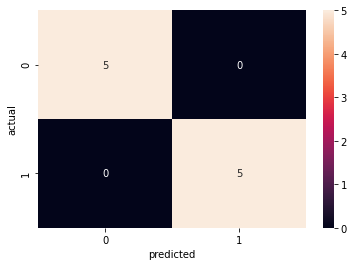

In [29]:
# Apply train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(y_test.size)
print(x_test.size)

# Apply the logistic regression

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)

# Use the code below to get the Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['actual'],
                               colnames=['predicted'])
sn.heatmap(confusion_matrix, annot=True)

# The final part, print the Accuracy

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

In [39]:
# Checking the Prediction for a New Set of Data
new_candidates = {'gmat': [590,740,680,610,710, 200, 100],
                  'gpa': [2,3.7,3.3,2.3,3,1,1],
                  'work_experience': [3,4,6,1,5,1,1]
                  }
df2 = pd.DataFrame(new_candidates, columns=['gmat', 'gpa', 'work_experience'])
print(df2)

# the prediction for the 5 new candidates
y_pred1 = logistic_regression.predict(df2)
print('admitted: ',y_pred1)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
5   200  1.0                1
6   100  1.0                1
admitted:  [0 1 1 0 1 0 0]


# Support Vertor Machine (SVM) 

In [2]:
# data set from https://archive.ics.uci.edu/ml/datasets/banknote+authentication

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

bankdata = pd.read_csv('D:/Datasets/bill_authentication.csv')

# make EDA Exploratory Data  Analysis
print(bankdata.shape)
print(bankdata.head())

(1372, 5)
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
#  ทำ Data Preprocessing โดยกำหนด attribute และ class ให้เรียบร้อย และแบ่งข้อมูลออกเป็น training set และ testing set

x = bankdata.drop('Class',axis=1)
y = bankdata['Class']
print(x.head())
print(y.head())

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)


   Variance  Skewness  Curtosis  Entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [4]:
# train the algorithm ในที่นี้ใช้ ใช้ library svm ของ Scikit-Learn ผ่านเมธอด fit

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
# คาดการณ์ด้วยชุดข้อมูลที่เป็น testing set ผ่านเมธอด predict

y_pred = svclassifier.predict(x_test)

[[144   0]
 [  2 129]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       144
           1       1.00      0.98      0.99       131

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



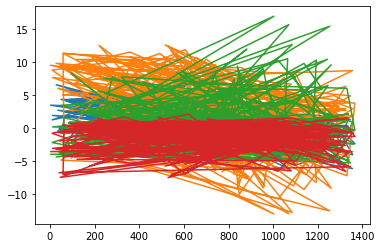

In [6]:
# ประเมินผลด้วย confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


plt.plot(x_test)

# KNN K-Nearest Neighbor

In [1]:
# import the load_iris function from datasets module
from sklearn.datasets import load_iris

In [2]:
# create bunch object containing iris datasets and it's attributes
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [5]:
# print the iris datasets
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# name of 4 features (column names)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# integers representing the species: 0=setosa, 1=versicolor, 2=virinica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [12]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
# we have a total of 150 observations and 4 features
print(iris.data.shape)

(150, 4)


In [18]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=4)

In [19]:
# shape of train and test objects
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [20]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [27]:
# import the KNeighborClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

# import metrics model to check the accuracy
from sklearn import metrics

# try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

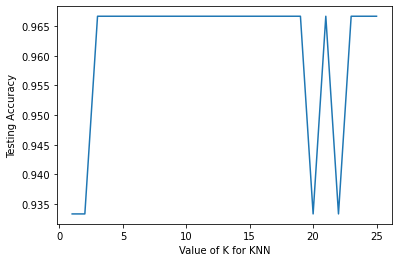

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
# 0 = setosa, 1 = versicolor, 2=virginica
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

# marking prediction on same unseen data
# predict for the below two random observations

x_new = [[3,4,5,3],
         [5,4,2,2],
         [5,3,5,1]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])

# Decision Tree

In [8]:
# import the following libraries

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

#  iris datasets from UC Irvine Machine Leaning Repository
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [9]:
# in the proceeding section
x.head()
y = pd.get_dummies(y)

In [10]:
# set a quarter of the data aside for testing
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
x_train.shape

(112, 4)

In [11]:
# DecisionTreeClassifier supervised machine learning algorithm
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

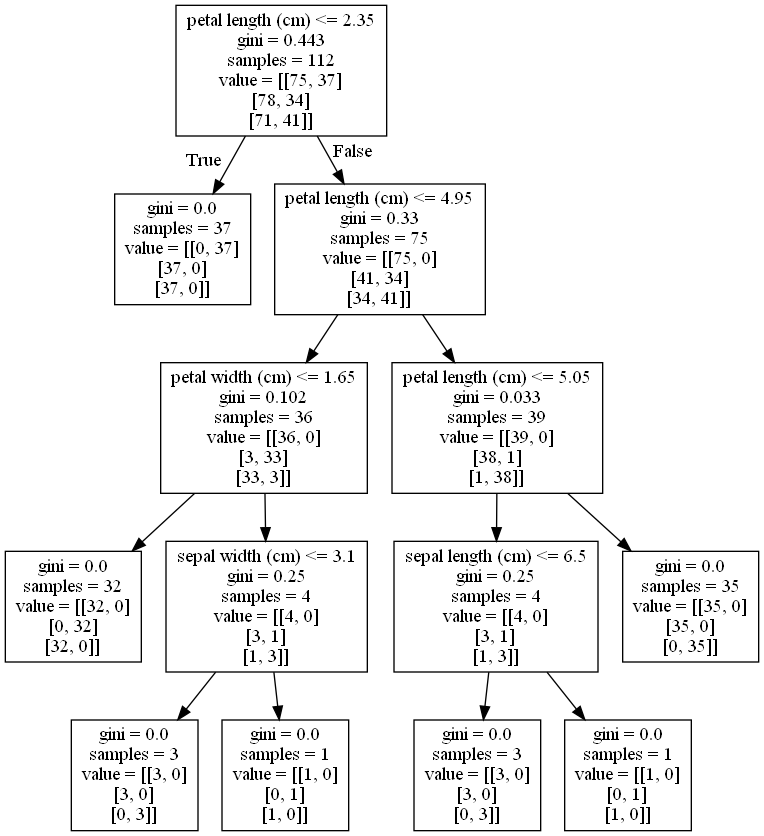

In [12]:
# view the actual decision tree produced

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)

(graph, ) = graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [13]:
y_pred = dt.predict(x_test)
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

# Ensembel Models

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

In [19]:
type(iris)

sklearn.utils.Bunch

In [20]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [33]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [34]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [37]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
iris.data.shape
x = iris.data
y = iris.target

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [56]:
from sklearn.ensemble import BaggingClassifier

In [62]:
bc = BaggingClassifier()

In [67]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [87]:
y_pred = bc.predict(x_test)
print(x_test)
print(y_pred)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [93]:
x_new = [[2,3,4,2], 
         [1,1,0,1], 
         [3,4,6,4]]
y_pred1 = bc.predict(x_new)
print(y_pred1)

[2 0 2]


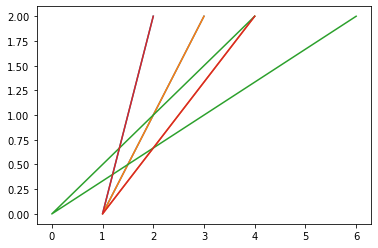

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_new,y_pred1)